<a href="https://colab.research.google.com/github/fedhere/PUS2024/blob/main/HW3/instructions_Notebook_Linear_Regression___Water_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE LINEAR REGRESSION

# 1) read in the data
read in the data on water consumption, I extracted it from https://www.mdpi.com/2079-9276/8/3/156 and saved it in HW3 as water_consumption.csv

We are going back to this problem after we study Classification and Regression Trees and we will try to model this data with an Random Forest

In [ ]:
import pandas as pd
df = pd.read_csv(...., index_col=0)

In [ ]:
df.head()

,Date,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
2010-08-15,2010-08-15,24.336416,6.481994,0.659460,502348.816168,197168.749996,37.706850,2.960570e+06,0.677396,0.640112
2010-08-29,2010-08-29,25.037518,10.852795,0.659460,502348.816168,198457.438148,35.784861,2.965557e+06,5.821554,0.641042
2010-09-12,2010-09-12,25.037518,10.832737,0.659460,502348.816168,198457.438148,41.619670,2.965557e+06,22.124608,0.641042
2010-09-26,2010-09-26,25.037518,12.346707,0.658733,513199.230595,200091.929540,47.335604,2.977833e+06,22.982144,0.641244
2010-10-10,2010-10-10,25.104217,13.063567,0.658733,513199.230595,201419.215320,52.424959,2.977833e+06,75.940850,0.641244


the first column is a date. To ensure it as read in _as a date variable_ force a conversion to datetime

In [ ]:
# prompt: convert the second column of df to datetime

import pandas as pd
df.loc[:, 'Date'] = pd.to_datetime(df.loc[:, 'Date'])


In [ ]:
#using df.info you get the data type for each feature (=column) - datetime sows as "object"
df.info()

plot all fratures against Date. Note, to see all plots in a single window I created a 3x4 matrix of axes. First I create a figure of the appropriate size with `plt.figure(figsize=(15, 10))`. Then I populate each subplot with `ax = plt.subplot(3, 4, 1)`: this sets the specific subplot to the axis object called `ax`. The numbre in parenthesis are: the number of axes rows (3), the number of axes columns (4) and the specific subplot number, counted let to right and top to bottom. I put the target variable in the top left (subplot 1) with `ax = plt.subplot(3, 4, 1)`

I want **you** to plot all other variables in the second and third row: start with `ax = plt.subplot(3, 4, 5)` and go through `ax = plt.subplot(3, 4, 12)`, changing the name of the variable to be plotted


# 2) Descriptive statistics

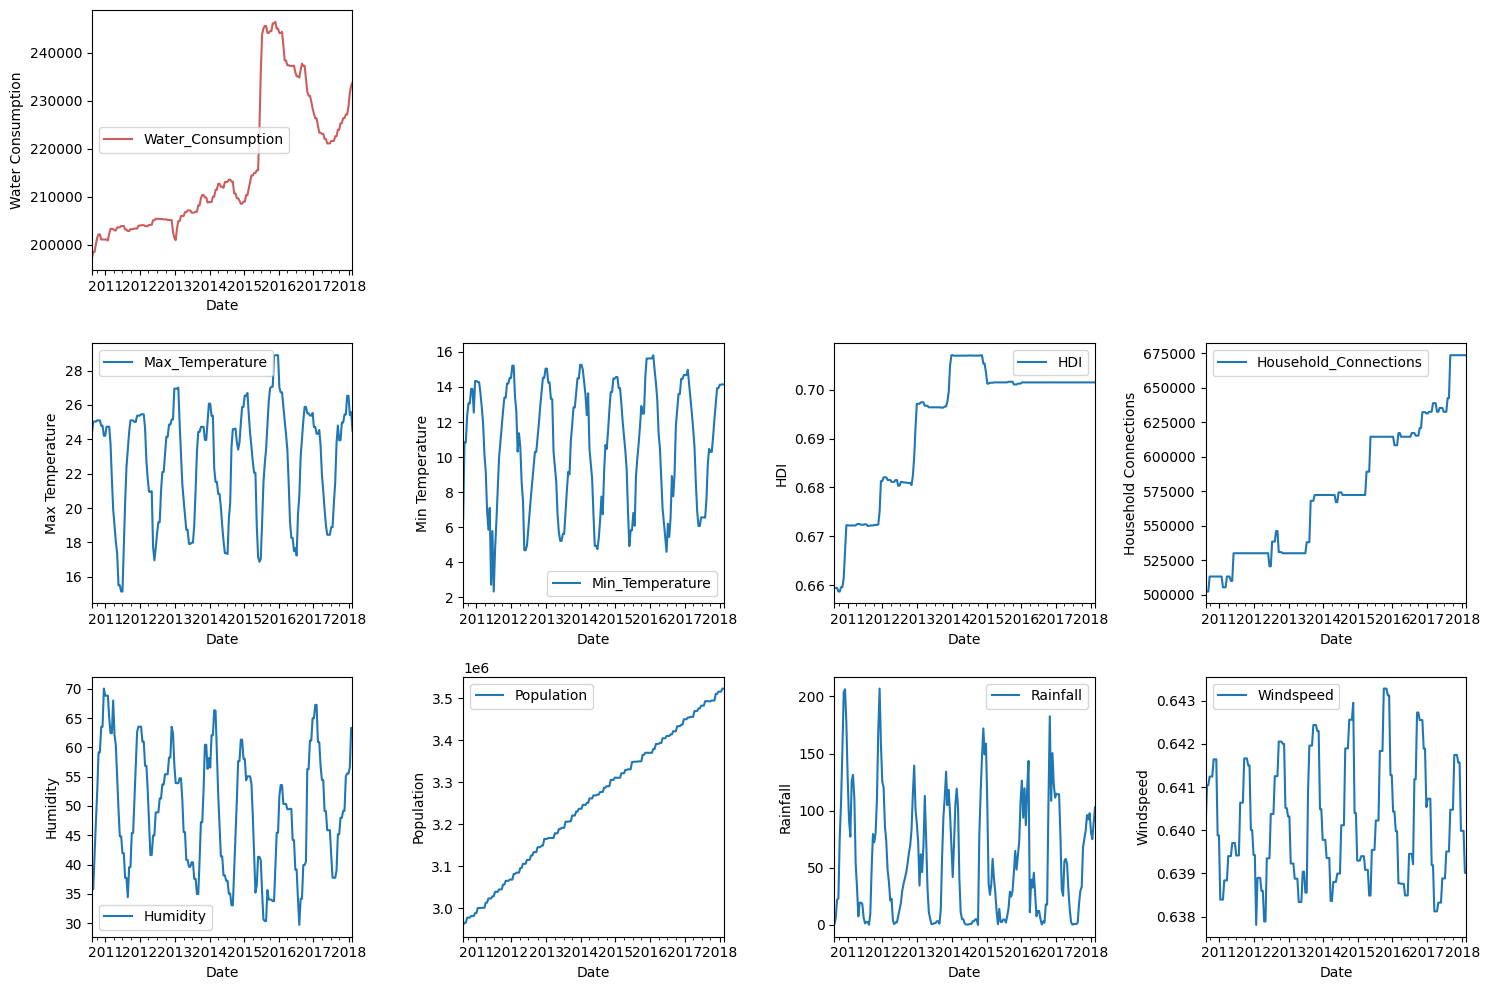

In [ ]:
# prompt: plot all fratures against Date

import matplotlib.pyplot as plt

# Plotting all features against Date
plt.figure(figsize=(15, 10))

ax = plt.subplot(3, 4, 1)
df.plot('Date', 'Water_Consumption', ax=ax, color='IndianRed')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

....

plt.tight_layout()
plt.show()


### CAPTION HERE

In [ ]:
# use the method describe to see the statistical properties of the dataframe
...

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02,197.000000,197.000000
mean,22.820151,10.755184,0.693206,575469.302905,216086.151748,49.327576,3.253261e+06,56.300944,0.640164
std,3.214211,3.450827,0.013474,48696.828622,14132.209414,10.165083,1.627993e+05,52.049954,0.001396
min,15.146338,2.336682,0.658733,502348.816168,197168.749996,29.708175,2.960570e+06,-0.031489,0.637809
25%,20.275245,7.596494,0.681300,530077.653037,204110.307828,40.525643,3.115161e+06,7.538785,0.639014
50%,23.964625,11.355749,0.701456,572273.709141,210313.350617,49.408814,3.268602e+06,40.916367,0.639882
75%,25.104217,13.930920,0.701474,614469.765245,226332.627614,57.033724,3.390970e+06,96.142387,0.641277
max,28.896027,15.808946,0.707032,673544.243791,246476.038257,70.025291,3.522545e+06,206.857482,0.643281


### COMMENT HERE

Plot a histogram of each feature separately. Comment on the distributions: e.g., which are bell shaped, which are multi-peaked, anything you think is notable

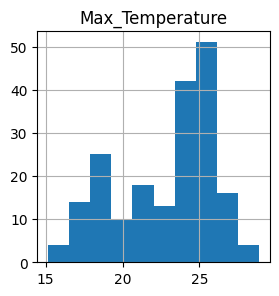

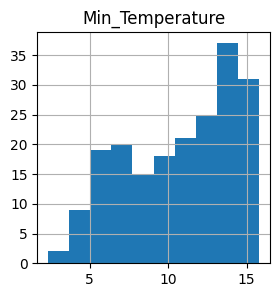

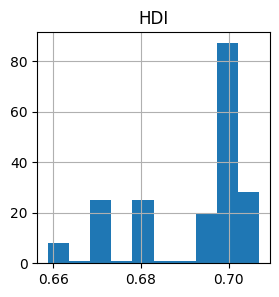

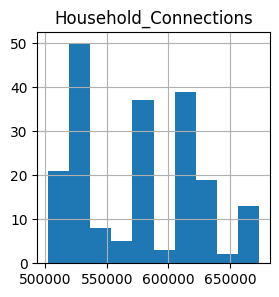

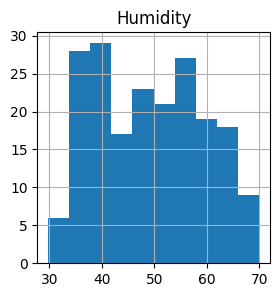

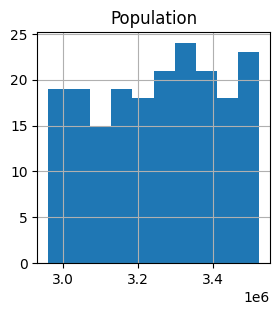

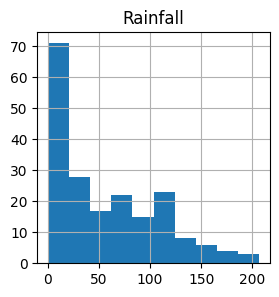

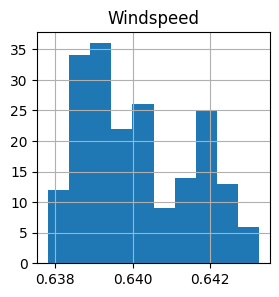

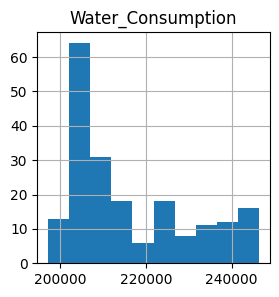

In [ ]:
...

### CAPTION HERE

# 3) Exploratory data analysis

Look at the correlation of the variables, pay attention to what is linearly correlatefd with the Water Consumption. If we had a single variable with high linear correlation with the target, we could try a univariate linear regression.

In [ ]:
df_copy.iloc[:,1:].corr()

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,1.000000,0.894710,0.042989,0.136172,0.160549,0.335020,0.098926,0.588840,0.494267
Min_Temperature,0.894710,1.000000,0.025292,0.064923,0.055879,0.643721,0.037800,0.758492,0.288344
HDI,0.042989,0.025292,1.000000,0.714116,0.594874,-0.207362,0.834549,-0.136051,-0.024970
Household_Connections,0.136172,0.064923,0.714116,1.000000,0.811606,-0.177808,0.961420,-0.046897,0.096903
Water_Consumption,0.160549,0.055879,0.594874,0.811606,1.000000,-0.312399,0.793164,-0.064579,0.171201
Humidity,0.335020,0.643721,-0.207362,-0.177808,-0.312399,1.000000,-0.193239,0.723015,-0.143531
Population,0.098926,0.037800,0.834549,0.961420,0.793164,-0.193239,1.000000,-0.087344,0.044513
Rainfall,0.588840,0.758492,-0.136051,-0.046897,-0.064579,0.723015,-0.087344,1.000000,0.262433
Windspeed,0.494267,0.288344,-0.024970,0.096903,0.171201,-0.143531,0.044513,0.262433,1.000000


### CAPTION HERE:
QUESTION (answer here) - can you guess what the maximum result with can get with unvariate linear regression based on the correlation result and the model's R^2? _hint_ https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide-2.php#:~:text=What%20is%20the%20Coefficient%20of,0.6%20x%200.6%20%3D%200.36).

# 3) Linear Regression

## 3A) Univariate model

Start with a univariate linear regression, choose the variable with the highest coefficient. Choose whichever model you prefer.

In [ ]:
# _your code here_
y = df_copy['Water_Consumption']
...


model_univariate = ...
prediction = ... # make the prediction of the model based on the full input dataset (X)

Text(0, 0.5, 'Water Consumption')

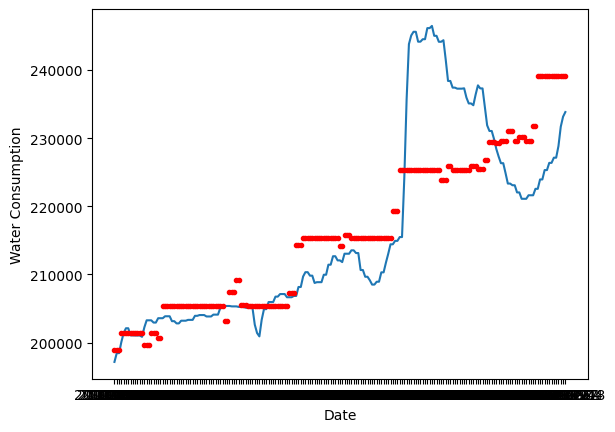

In [17]:

import pylab as plt
plt.plot(df['Date'], y)
plt.plot(df['Date'], prediction, 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')


### CAPTION HERE

#3B) multivariate model with statsmodels

One method for linear regression is the statsmodels Ordinary Least Square. I made the model below. Look at the P>|t| column of the report. NOTE: that represents the probability that "by chance" the variable would have that influence on the model, even if it did not explain the independent variable.

In [ ]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable

import statsmodels.formula.api as smf

# Define the formula for the regression
formula = 'Water_Consumption ~ Max_Temperature + Min_Temperature + HDI + Household_Connections + Humidity + Population + Rainfall + Windspeed'

# Fit the model
model = smf.ols(formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Water_Consumption   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.85
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           1.47e-49
Time:                        09:23:01   Log-Likelihood:                -2032.3
No. Observations:                 197   AIC:                             4083.
Df Residuals:                     188   BIC:                             4112.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.818e+

look at the R^2 above, and at the P>|t|, what do they represent?

Assiming a p-value of 0.05, report in a cell of text below _which variables are significant in the fit_:


# 3C) Now use sklearn like in class and lets do things right! training-test split!


### 3C - 1)
First select the numerical columns and store them in a list called numerical_features

In [ ]:
# prompt: whiten the dataframe


# Select the numerical features
numerical_features = ...
numerical_features

### 3C - 2) standardize the features

NOTE THE NUMERICAL FEATURES: they live in very different regimes! for example household connections ins in the ~100,000, while wind speed is ~0.1.

Before modeling the data with a linear regression it is apprioriate to STANDARDIZE the features: subtracting the mean and dividing by the standard deviation, so that they are mean=0 std=1. Note: this does not change the **shape** of the distribution, it just translates it and shrinks it

Thankfully, sklearn offers a library of functions for preprocessing the data: standardize the features with sklearn StandardScaler. Like all sklearn functions, first create an object, then fit it to the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features
scaler.fit(df[numerical_features])

StandardScaler()

to generate the scaled features transform the original feature set

In [ ]:
scaled_features = scaler.transform(df[numerical_features])
scaled_features

array([[ 0.47293977, -1.24146403, -2.51082218, ..., -1.07137969,
        -0.03718638, -1.34201231],
       [ 0.69162118,  0.02835829, -2.51082218, ..., -0.97229672,
         0.63119909, -1.25059197],
       [ 0.69162118,  0.02253108, -2.51082218, ..., -0.65827933,
         0.63119909, -1.25059197],
       ...,
       [ 0.80744552,  0.97968328,  0.61521731, ...,  0.36029122,
        -0.12687215,  1.10653667],
       [ 0.86304614,  0.98521971,  0.61521731, ...,  0.6399626 ,
        -0.82569644,  1.2106605 ],
       [ 0.52422241,  0.98521971,  0.61521731, ...,  0.89472364,
        -0.82569644,  1.25934093]])

Plot a histogram of each feature _after_ standardizing compare it to the plot above: is the shape the same? it sholud be identical! but the x-axis should be different

In [1]:
...

Ellipsis

save the features in a new dataset

In [ ]:
df_copy = df.copy()
# Transform the numerical features
df_copy[numerical_features] = scaler.transform(df[numerical_features])

# Print the whitened DataFrame
df_copy

look at the statistical properties of this new dataset with the method `describe`. Do they make sense?

In [ ]:
df_copy.describe()


### 3C - 3) TRAIN-TEST SPLIT to avoid overfitting



In [ ]:
# prompt: multilinear regression with all variables in the dataframe except data witih water consumption as endogenous variable with sklearn
from sklearn.model_selection import train_test_split

# Select the features (independent variables)
vars = numerical_features
X1 = df_copy[vars]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = ....


Mean Squared Error: 0.3420468071589484
R-squared: 0.6098046035171196
Coefficients: [('Max_Temperature', -0.2919819917149176), ('Min_Temperature', 0.5095721039123409), ('HDI', -0.20188300768994072), ('Household_Connections', 0.30929839485768795), ('Humidity', -0.5739886741570119), ('Population', 0.6238742590778739), ('Rainfall', 0.20815428182251391), ('Windspeed', -0.03421611574026581)]
Intercept: 0.0038308696007070993


### 3C -4) NOW FIT THE DATA WITH THE sklearn LinearRegression model

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model_multivariate = ...

# Fit the model to the training data
...

# Make predictions on the testing data
y_pred_test = ...

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Print the coefficients and intercept
print("Coefficients:", list(zip(vars, model1.coef_)))
print("Intercept:", model1.intercept_)


### 3C-5 Visualize the model

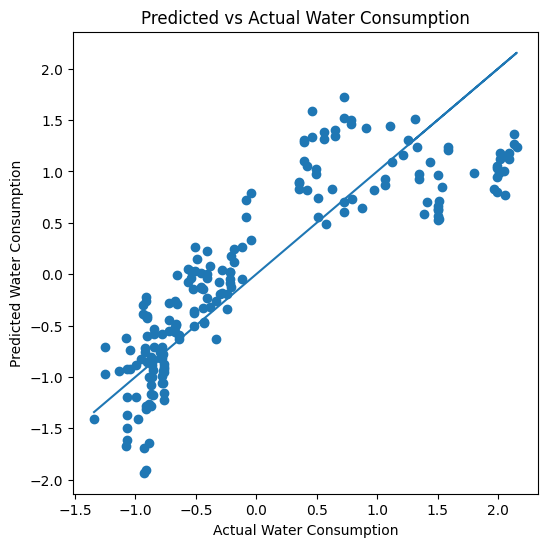

In [ ]:
# prompt: plot predicted vs actual water_consumption based on sklearn model

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate.predict(X1))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


CAPTION

Text(0, 0.5, 'Water Consumption')

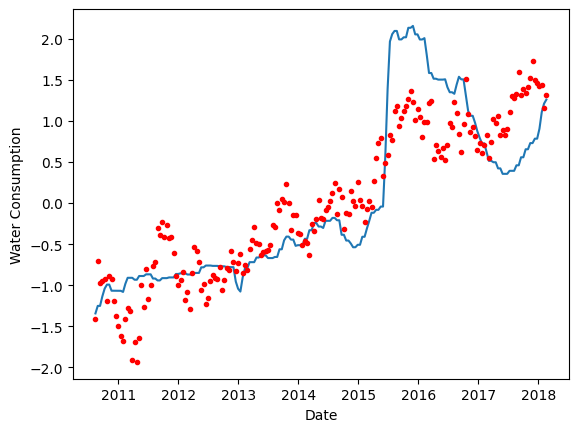

In [ ]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model1.predict(X1), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

CAPTION

## 3D) SIMPLIFY THE MODEL
 You can simplify the model! this is what they did in  https://www.mdpi.com/2079-9276/8/3/156



### 3D - 1) Only use the columns that have a correlation higher than 0.5  $r>0.5$ with Water_consumption

In [ ]:
df_copy.iloc[:,1:].corr() > 0.5

,Max_Temperature,Min_Temperature,HDI,Household_Connections,Water_Consumption,Humidity,Population,Rainfall,Windspeed
Max_Temperature,True,True,False,False,False,False,False,True,False
Min_Temperature,True,True,False,False,False,True,False,True,False
HDI,False,False,True,True,True,False,True,False,False
Household_Connections,False,False,True,True,True,False,True,False,False
Water_Consumption,False,False,True,True,True,False,True,False,False
Humidity,False,True,False,False,False,True,False,True,False
Population,False,False,True,True,True,False,True,False,False
Rainfall,True,True,False,False,False,True,False,True,False
Windspeed,False,False,False,False,False,False,False,False,True


In [ ]:
vars2 = ... #you can do this programmatically using the result of the code above, or just read out the variable corelation and typing the names of the variables in a list here

### 3D - 2) redo a multivariate fit with sklearn, just like above

In [ ]:
X2 = df_copy[vars2]

# Select the target variable (dependent variable)
y = df_copy['Water_Consumption']

# Split the data into training and testing sets

...
# Create a Linear Regression model
...
# Fit the model to the training data
...
# Make predictions on the testing data
...
# Evaluate the model

...
# Print the coefficients and intercept
...

Mean Squared Error: 0.34083550523675454
R-squared: 0.6111864156665057
Coefficients: [('HDI', -0.06386950349337539), ('Household_Connections', 0.5581389845700677), ('Population', 0.32711591022971703)]
Intercept: 0.007898437962974932


# 3D - 3) plot the model predictions, just like above

Text(0, 0.5, 'Water Consumption')

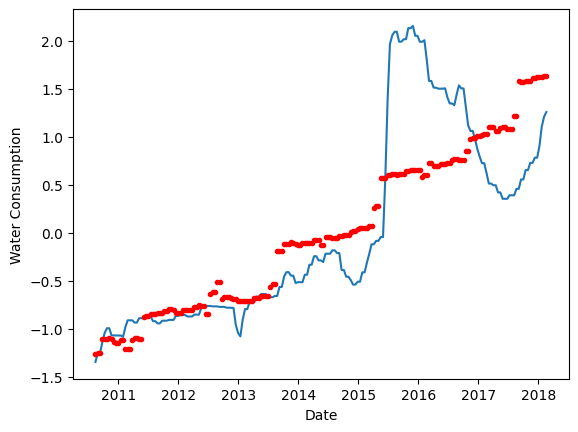

In [ ]:
plt.plot(df['Date'], y)
plt.plot(df['Date'], model_multivariate_restricted.predict(X2), 'r.')
plt.xlabel('Date')
plt.ylabel('Water Consumption')

### CAPTION

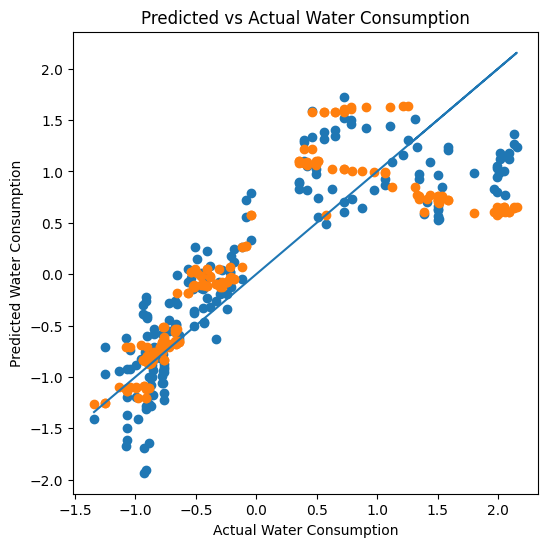

In [ ]:
plt.figure(figsize=(6, 6))
# Plot predicted vs actual water consumption
plt.scatter(y, model_multivariate_restricted.predict(X1))
plt.scatter(y, model_multivariate_restricted.predict(X2))
plt.xlabel("Actual Water Consumption")
plt.ylabel("Predicted Water Consumption")
plt.title("Predicted vs Actual Water Consumption")
plt.plot(y, y)
plt.show()


# CAPTION

which model is better?